## Observations and Insights 

After running an analysis on the effects of different drugs on tumor volume in mice, we can conclude that since Capomulin and Ramicane had the highest number of timepoints (more exposure to treatment), their treatments were most effective in shrinking tumor size (**when put up against Ceftamin and Infubinol**). For the most part, when mice were treated by Capomulin, tumor volume seemed to decrease over time (could be due to prolonged exposure). Another conclusion we can make from the analysis is when weight increases, so does tumor volume.

In [67]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged = pd.merge(mouse_metadata, study_results, how='left', on=['Mouse ID', 'Mouse ID'])
# Display the data table for preview
merged.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(merged['Mouse ID'].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merged[merged[['Mouse ID', 'Timepoint']].duplicated()]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
merged[merged['Mouse ID'] == 'g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
drop = merged.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
drop.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
len(drop['Mouse ID'].unique())

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
group = drop.groupby(['Drug Regimen'])
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
avg_tumorvol = round(group['Tumor Volume (mm3)'].mean(),2)
med_tumorvol = round(group['Tumor Volume (mm3)'].median(),2)
var_tumorvol = round(group['Tumor Volume (mm3)'].var(),2)
std_tumorvol = round(group['Tumor Volume (mm3)'].std(),2)
sem_tumorvol = round(group['Tumor Volume (mm3)'].sem(),2)


tumorvol_summary = pd.DataFrame({'Average Tumor Volume (mm3)': avg_tumorvol,
                                'Median Tumor Volume (mm3)':med_tumorvol,
                                'Variance (mm3)':var_tumorvol,
                                'Standard Deviation (mm3)':std_tumorvol,
                                'SEM (mm3)':sem_tumorvol})

tumorvol_summary

,Average Tumor Volume (mm3),Median Tumor Volume (mm3),Variance (mm3),Standard Deviation (mm3),SEM (mm3)
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumorvol_aggsum = round(group['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem']),2)
# Using the aggregation method, produce the same summary statistics in a single line
tumorvol_aggsum.rename(columns={'mean':'Average Tumor Volume (mm3)',
                               'median':'Median Tumor Volume (mm3)',
                               'var':'Variance (mm3)',
                               'std':'Standard Deviation (mm3)',
                               'sem':'SEM (mm3)'})

,Average Tumor Volume (mm3),Median Tumor Volume (mm3),Variance (mm3),Standard Deviation (mm3),SEM (mm3)
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

Text(0, 0.5, 'Total Timepoints')

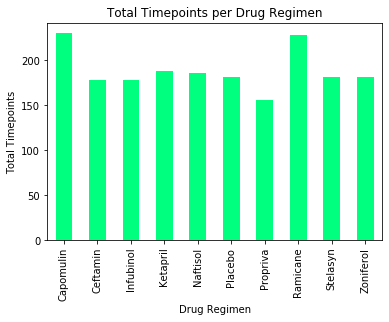

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
time = group['Timepoint'].count()

plot = time.plot.bar(title='Total Timepoints per Drug Regimen',color='springgreen')
plot.set_ylabel('Total Timepoints')

Text(0, 0.5, 'Timepoints')

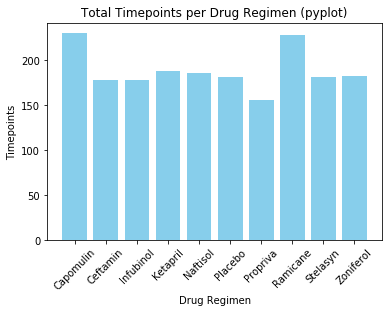

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x = range(len(time))
y = time

n = list(time.index.values)
l = [tick for tick in x]


plt.bar(x,y, color = 'skyblue')
plt.xticks(l,n, rotation = 45)
plt.title('Total Timepoints per Drug Regimen (pyplot)')
plt.xlabel('Drug Regimen')
plt.ylabel('Timepoints')

Text(0, 0.5, '')

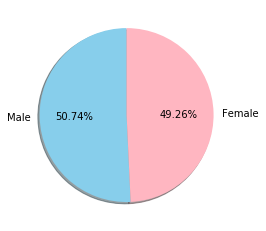

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gen = drop['Sex'].value_counts()
pie = gen.plot.pie(y='Mouse ID',colors=['skyblue','lightpink'], autopct = "%.2f%%", shadow = True,startangle=90)
pie.set_ylabel('')

(-1.1032653842934317,
 1.1062424936743747,
 -1.1053783266922992,
 1.1002561107948714)

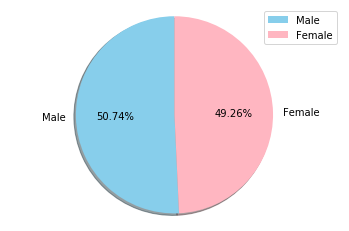

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
py = drop['Sex'].value_counts()
explode = (0,0)
labels = py.index
plt.pie(py,explode=explode,labels=labels,colors=['skyblue','lightpink'], autopct = "%.2f%%", shadow = True, startangle=90)
plt.legend(labels=labels)
plt.axis('equal')


## Quartiles, Outliers and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tp = drop.groupby(['Mouse ID'])['Timepoint'].max()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
newdf = pd.merge(max_tp,drop,on=['Mouse ID', 'Timepoint'])

In [88]:
# Put treatments into a list for for loop (and later for plot labels)
drug = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumorvol = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for x in drug:
    t = newdf[newdf['Drug Regimen'] == x]
    v = t['Tumor Volume (mm3)']
    tumorvol.append(v)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
q1 = tumorvol[0].quantile([.25,.5,.75])
lq1 = q1[0.25]
uq1 = q1[0.75]
iqr1 = uq1-lq1

q2 = tumorvol[1].quantile([.25,.5,.75])
lq2 = q2[0.25]
uq2 = q2[0.75]
iqr2 = uq2-lq2

q3 = tumorvol[2].quantile([.25,.5,.75])
lq3 = q3[0.25]
uq3 = q3[0.75]
iqr3 = uq3-lq3

q4 = tumorvol[3].quantile([.25,.5,.75])
lq4 = q4[0.25]
uq4 = q4[.75]
iqr4 = uq4-lq4

lb1 = lq1 - (iqr1*1.5)
ub1 = uq1 + (iqr1*1.5)

lb2 = lq2 - (iqr2*1.5)
ub2 = uq2 + (iqr2*1.5)

lb3 = lq3 - (iqr3*1.5)
ub3 = uq3 + (iqr3*1.5)

lb4 = lq4 - (iqr4*1.5)
ub4 = uq4 - (iqr4*1.5)


print(f"{drug[0]} values below {lb1} and above {ub1} could be outliers.")
print(f"{drug[1]} values below {lb2} and above {ub2} could be outliers.")
print(f"{drug[2]} values below {lb3} and above {ub3} could be outliers.")
print(f"{drug[3]} values below {lb4} and above {ub4} could be outliers.")

Capomulin values below 20.70456164999999 and above 51.83201549 could be outliers.
Ramicane values below 17.912664470000003 and above 54.30681135 could be outliers.
Infubinol values below 36.83290494999999 and above 82.74144559000001 could be outliers.
Ceftamin values below 25.355449580000002 and above 40.93320176 could be outliers.


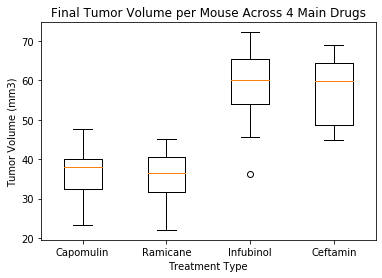

In [87]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume per Mouse Across 4 Main Drugs')
ax1.set_xlabel('Treatment Type')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumorvol,labels=drug)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

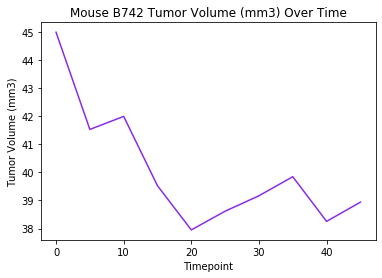

In [54]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
v = drop[drop['Drug Regimen'] == 'Capomulin']
b742 = v[v['Mouse ID'] == 'b742']
y1 = b742['Tumor Volume (mm3)']
x1 = b742['Timepoint']

plt.plot(x1,y1, color='blueviolet')
plt.title('Mouse B742 Tumor Volume (mm3) Over Time')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

Text(0, 0.5, 'Average Tumor Volume (mm3)')

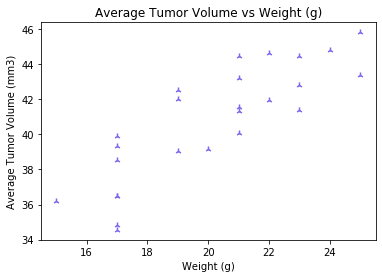

In [70]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
av = v.groupby(['Mouse ID']).mean()
av.head()
y2 = av['Tumor Volume (mm3)']
x2 = av['Weight (g)']

plt.scatter(x2,y2,color='mediumslateblue', marker='2')
plt.title('Average Tumor Volume vs Weight (g)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

## Correlation and Regression

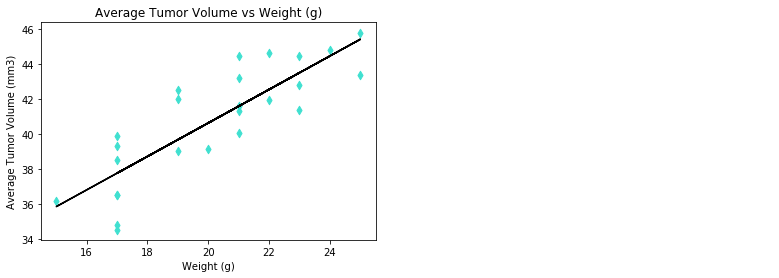

The r-squared is: 0.71
The correlation coefficient is: 0.84


In [85]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr = st.pearsonr(x2,y2)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x2, y2)
regress_values = x2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x2,y2,color='turquoise',marker='d')
plt.plot(x2,regress_values,"r-",color='black')
plt.annotate(line_eq,(34,46),fontsize=15,color="red")
plt.title('Average Tumor Volume vs Weight (g)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
print(f"The r-squared is: {round(rvalue**2,2)}")
print(f"The correlation coefficient is: {round(corr[0],2)}")